In [ ]:
!pip install sentinelhub

In [6]:
!git clone https://github.com/sentinel-hub/eo-learn.git
!git clone https://github.com/sentinel-hub/water-observatory-backend.git

Cloning into 'eo-learn'...
remote: Enumerating objects: 427, done.
remote: Counting objects: 100% (427/427), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 10451 (delta 222), reused 281 (delta 145), pack-reused 10024
Receiving objects: 100% (10451/10451), 470.90 MiB | 19.63 MiB/s, done.
Resolving deltas: 100% (6381/6381), done.
Checking out files: 100% (360/360), done.
Cloning into 'water-observatory-backend'...
remote: Enumerating objects: 49, done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 49
Unpacking objects: 100% (49/49), done.


In [12]:

%cd eo-learn
!python install_all.py '-e'

/content/eo-learn
Obtaining file:///content/eo-learn/core
     |████████████████████████████████| 133kB 11.3MB/s 
     |████████████████████████████████| 972kB 10.4MB/s 
     |████████████████████████████████| 14.5MB 329kB/s 
     |████████████████████████████████| 14.8MB 165kB/s 
     |████████████████████████████████| 143kB 54.1MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Running setup.py develop for eo-learn-core
  Found existing inst

In [14]:
%cd ..
!pip install --upgrade pip
!pip install jupyter
!pip install recordclass



!pip install tornado==5.1.1



!wget https://raw.githubusercontent.com/mlubej/water_detection_notebook/master/water_level_extraction.ipynb

/content
  Using cached https://files.pythonhosted.org/packages/55/73/bce122d1ed0217b3c1a3439ab16dfa94bbeabd0d31755fcf907493abf39b/pip-20.3-py2.py3-none-any.whl
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 156 kB 13.4 MB/s 
  Created wheel for recordclass: filename=recordclass-0.14.3-cp36-cp36m-linux_x86_64.whl size=339708 sha256=0697cb3ac0b727709feb54e30d18dc6840e9aa4b4f1e0c59539223b96fbdc71c
  Stored in directory: /root/.cache/pip/wheels/fa/e7/4d/dc41cfb0f1566d6517041e9ffee1e61cb472ade8b2dce05f13
Successfully built recordclass
--2020-12-02 17:58:20--  https://raw.githubusercontent.com/mlubej/water_detection_notebook/master/water_level_extraction.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP reque

## Le notebook n'est plus disponible ....

In [ ]:
# set the autoreload and the inline plotting for matplotlib
!pip install numpy==1.11.0
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# data manipulation
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# image manipulations
from skimage.filters import threshold_otsu, sobel
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, disk

# GIS related
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import shape, MultiPolygon, Polygon

# eo-learn related
from eolearn.core import EOTask, EOPatch, LinearWorkflow, Dependency, FeatureType, LoadFromDisk, SaveToDisk
from eolearn.io import S2L1CWCSInput 
from eolearn.mask import AddCloudMaskTask, AddValidDataMaskTask, get_s2_pixel_cloud_detector
from eolearn.features import SimpleFilterTask
from eolearn.geometry import VectorToRaster

# Sentinel Hub
from sentinelhub import BBox, CRS

# water observatory backend
import sys
sys.path.append('./water-observatory-backend/src')
#from visualisation import plot_water_body
from geom_utils import get_bbox
from s2_water_extraction import get_water_level_optical
from visualisation import draw_multi, draw_poly

# other
import urllib.request as request
import json
from datetime import datetime
from shapely.wkt import loads

  Using cached numpy-1.11.0.zip (4.7 MB)
  ERROR: Failed building wheel for numpy
  Running setup.py clean for numpy
  ERROR: Failed cleaning build dir for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4


## Cette partie marche

/usr/local/lib/python3.6/dist-packages/sentinelhub/data_collections.py:565: SHDeprecationWarning: In the future please specify data_collection parameter, for now taking DataCollection.SENTINEL2_L1C
  'DataCollection.SENTINEL2_L1C', category=SHDeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:49: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


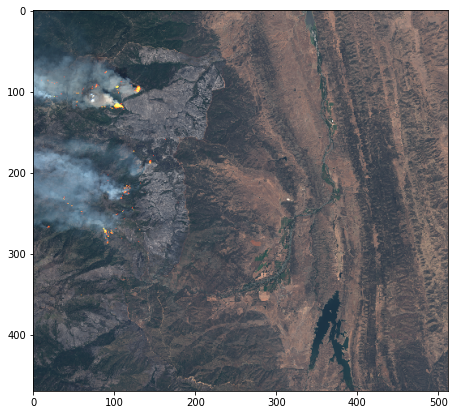

In [5]:


INSTANCE_ID = '5f6bcc03-4ebc-4c89-8bf3-802332444ae5'  # In case you put instance ID into configuration file you can leave this unchanged

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import datetime
import numpy as np

import matplotlib.pyplot as plt
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

from sentinelhub import CustomUrlParam


# Tip: if you want to insert the coordinates from google, you will need to set
# the first two coordinates for the upper left corner (-122.41, 39.31)
# and second two (-122.75, 39.55) will refer to lower right corner of the box
# Lastly: lat long from Google maps needs to be switched around (e.g. for lower corner 
# google maps will give you '39.55, -122.75'; you need to switch out around to read -122.75, 39.55)

betsiboka_coords_wgs84 = [-122.41, 39.31, -122.75, 39.55]
betsiboka_bbox2 = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)


my_url = 'https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/markuse_fire/script.js'
# https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/nbr/script.js

evalscripturl_wms_request = WmsRequest(layer='TRUE-COLOR-S2-L1C', # Layer parameter can be any existing layer
                                       bbox=betsiboka_bbox2,
                                       time='2018-08-28',
                                       width=512,
                                       instance_id=INSTANCE_ID,
                                       custom_url_params={CustomUrlParam.EVALSCRIPTURL: my_url})

evalscripturl_wms_data = evalscripturl_wms_request.get_data()
plot_image(evalscripturl_wms_data[0])